In [ ]:
from google.colab import drive
import os
import cv2 as cv
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

**Converting Cat images to ndarray's and labeling images**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/dataset/data/trainingSet/trainingSet')

In [ ]:
os.chdir('1')

In [ ]:
os.listdir('.')

[]

In [ ]:
len(os.listdir('.'))

0

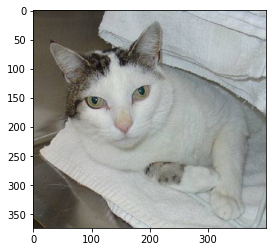

In [ ]:
#Displaying the image of cat
img_cat = mpimg.imread('/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Cats/cat.106.jpg')
plt.imshow(img_cat)

In [ ]:
type(img_cat)

numpy.ndarray

In [ ]:
img_cat.shape

(374, 400, 3)

In [ ]:
os.mkdir('/content/resized_image_Cat')

In [ ]:
original_folder = '/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Cats/'
resized_folder = '/content/resized_image_Cat/'

for i in range(830):
  filename = os.listdir(original_folder)[i]
  image_path = original_folder + filename

  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = image.convert('RGB')

  new_image_path = resized_folder + filename
  image.save(new_image_path)

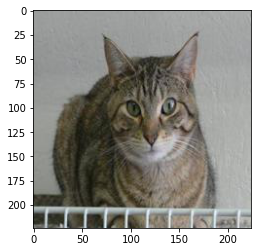

In [ ]:
#Displaying the resized image of cat
img_Cat_resized = mpimg.imread('/content/resized_image_Cat/cat.103.jpg')
plt.imshow(img_Cat_resized)

In [ ]:
type(img_Cat_resized)

numpy.ndarray

In [ ]:
img_Cat_resized.shape

(224, 224, 3)

In [ ]:
# Converting the resized images into ndarrays
image_directory = '/content/resized_image_Cat/'
image_extension = ['jpg', 'png']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

array_images_Cat = np.asarray([cv.imread(file) for file in files])

In [ ]:
print(array_images_Cat)

[[[[126 131 140]
   [132 137 146]
   [140 145 154]
   ...
   [149 156 159]
   [164 170 169]
   [163 170 167]]

  [[126 131 140]
   [132 137 146]
   [140 145 154]
   ...
   [146 152 157]
   [156 161 162]
   [153 159 158]]

  [[126 131 140]
   [132 137 146]
   [141 146 155]
   ...
   [141 146 155]
   [146 149 157]
   [143 146 151]]

  ...

  [[ 68  85  94]
   [ 25  43  50]
   [  2  16  22]
   ...
   [ 20  15   6]
   [ 21  16   7]
   [ 23  18   9]]

  [[ 75  93 104]
   [ 29  46  55]
   [  3  16  24]
   ...
   [ 22  16   5]
   [ 23  17   6]
   [ 23  17   6]]

  [[ 57  75  86]
   [ 20  37  46]
   [  0  16  23]
   ...
   [ 23  17   6]
   [ 22  16   5]
   [ 22  16   5]]]


 [[[ 32  60  71]
   [ 53  81  92]
   [ 62  90 101]
   ...
   [ 79  57  46]
   [ 76  54  43]
   [ 63  41  30]]

  [[124 148 160]
   [128 152 164]
   [118 142 154]
   ...
   [ 83  61  50]
   [ 79  57  46]
   [ 67  45  34]]

  [[ 80  96 108]
   [ 63  79  91]
   [ 63  79  91]
   ...
   [ 79  57  46]
   [ 72  50  39]
   [ 61  39

In [ ]:
type(array_images_Cat)

numpy.ndarray

In [ ]:
array_images_Cat.shape

(830, 224, 224, 3)

In [ ]:
# Creating lable names

y_Cat = np.empty(830)
y_Cat.fill(0)

In [ ]:
y_Cat = y_Cat.astype(int)

In [ ]:
y_Cat.shape

(830,)

In [ ]:
type(y_Cat)

numpy.ndarray

In [ ]:
print(y_Cat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

**Converting Dog images into ndarray and labeling**

In [ ]:
os.chdir('/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN')

In [ ]:
os.chdir('Dogs')

In [ ]:
os.listdir('.')

['dog.10.jpg',
 'dog.1.jpg',
 'dog.100.jpg',
 'dog.102.jpg',
 'dog.101.jpg',
 'dog.103.jpg',
 'dog.104.jpg',
 'dog.106.jpg',
 'dog.105.jpg',
 'dog.107.jpg',
 'dog.108.jpg',
 'dog.109.jpg',
 'dog.11.jpg',
 'dog.111.jpg',
 'dog.110.jpg',
 'dog.112.jpg',
 'dog.113.jpg',
 'dog.115.jpg',
 'dog.114.jpg',
 'dog.116.jpg',
 'dog.117.jpg',
 'dog.119.jpg',
 'dog.118.jpg',
 'dog.120.jpg',
 'dog.12.jpg',
 'dog.121.jpg',
 'dog.122.jpg',
 'dog.123.jpg',
 'dog.126.jpg',
 'dog.124.jpg',
 'dog.125.jpg',
 'dog.127.jpg',
 'dog.128.jpg',
 'dog.13.jpg',
 'dog.130.jpg',
 'dog.129.jpg',
 'dog.131.jpg',
 'dog.133.jpg',
 'dog.132.jpg',
 'dog.134.jpg',
 'dog.136.jpg',
 'dog.135.jpg',
 'dog.138.jpg',
 'dog.137.jpg',
 'dog.14.jpg',
 'dog.139.jpg',
 'dog.140.jpg',
 'dog.141.jpg',
 'dog.143.jpg',
 'dog.142.jpg',
 'dog.144.jpg',
 'dog.145.jpg',
 'dog.146.jpg',
 'dog.147.jpg',
 'dog.148.jpg',
 'dog.15.jpg',
 'dog.149.jpg',
 'dog.150.jpg',
 'dog.151.jpg',
 'dog.152.jpg',
 'dog.153.jpg',
 'dog.155.jpg',
 'dog.154.jpg',


In [ ]:
len(os.listdir('.'))

830

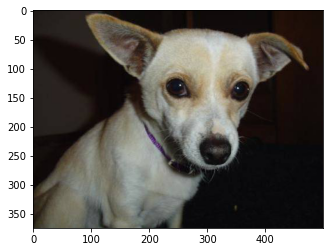

In [ ]:
#Displaying the image of dog
img_dog = mpimg.imread('/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Dogs/dog.104.jpg')
plt.imshow(img_dog)

In [ ]:
type(img_dog)

numpy.ndarray

In [ ]:
img_dog.shape

(375, 499, 3)

In [ ]:
os.mkdir('/content/resized_image_Dogs')

In [ ]:
original_folder = '/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Dogs/'
resized_folder = '/content/resized_image_Dogs/'

for i in range(830):
  filename = os.listdir(original_folder)[i]
  image_path = original_folder + filename

  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = image.convert('RGB')

  new_image_path = resized_folder + filename
  image.save(new_image_path)

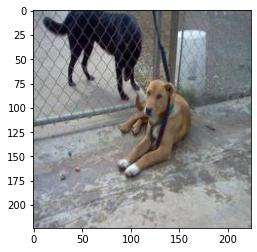

In [ ]:
#Displaying the Resized image of dog
img_Dog_resized = mpimg.imread('/content/resized_image_Dogs/dog.110.jpg')
plt.imshow(img_Dog_resized)

In [ ]:
type(img_Dog_resized)

numpy.ndarray

In [ ]:
img_Dog_resized.shape

(224, 224, 3)

In [ ]:
# Converting the resized images into ndarrays
image_directory = '/content/resized_image_Dogs/'
image_extension = ['jpg', 'png']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

array_images_Dog = np.asarray([cv.imread(file) for file in files])

In [ ]:
print(array_images_Dog)

[[[[ 13  17  12]
   [ 16  20  15]
   [ 18  22  17]
   ...
   [ 22  25  23]
   [ 19  25  20]
   [ 17  24  19]]

  [[ 14  18  13]
   [ 16  20  15]
   [ 18  22  17]
   ...
   [ 21  24  22]
   [ 18  24  19]
   [ 16  23  18]]

  [[ 14  18  13]
   [ 16  20  15]
   [ 17  21  16]
   ...
   [ 20  23  21]
   [ 17  23  18]
   [ 15  22  17]]

  ...

  [[ 20  19  21]
   [ 20  19  21]
   [  8   9  13]
   ...
   [ 11  18  15]
   [  9  16  13]
   [  7  14  11]]

  [[ 22  21  25]
   [ 22  21  25]
   [  9  10  14]
   ...
   [ 11  18  15]
   [  7  16  13]
   [  5  14  11]]

  [[ 23  22  26]
   [ 23  22  26]
   [ 10  11  15]
   ...
   [ 11  18  15]
   [  8  17  14]
   [  6  15  12]]]


 [[[ 40  76  62]
   [ 35  71  57]
   [ 21  60  45]
   ...
   [ 44  32  32]
   [ 36  31  30]
   [ 33  29  28]]

  [[ 68 104  90]
   [ 58  94  80]
   [ 34  73  58]
   ...
   [ 44  32  32]
   [ 37  32  31]
   [ 35  31  30]]

  [[ 72 108  94]
   [ 63  99  85]
   [ 39  78  63]
   ...
   [ 46  34  34]
   [ 39  34  33]
   [ 38  34

In [ ]:
type(array_images_Dog)

numpy.ndarray

In [ ]:
array_images_Dog.shape

(830, 224, 224, 3)

In [ ]:
# Creating lable names

y_Dog = np.empty(830)
y_Dog.fill(1)

In [ ]:
y_Dog = y_Dog.astype(int)

In [ ]:
y_Dog.shape

(830,)

In [ ]:
type(y_Dog)

numpy.ndarray

In [ ]:
print(y_Dog)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
os.chdir('/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN')

In [ ]:
os.chdir('Horses')

In [ ]:
os.listdir('.')

['horse-102.jpg',
 'horse-103.jpg',
 'horse-10.jpg',
 'horse-100.jpg',
 'horse-1.jpg',
 'horse-101.jpg',
 'horse-117.jpg',
 'horse-116.jpg',
 'horse-108.jpg',
 'horse-111.jpg',
 'horse-112.jpg',
 'horse-107.jpg',
 'horse-11.jpg',
 'horse-106.jpg',
 'horse-104.jpg',
 'horse-109.jpg',
 'horse-115.jpg',
 'horse-118.jpg',
 'horse-113.jpg',
 'horse-114.jpg',
 'horse-105.jpg',
 'horse-110.jpg',
 'horse-125.jpg',
 'horse-128.jpg',
 'horse-121.jpg',
 'horse-126.jpg',
 'horse-122.jpg',
 'horse-120.jpg',
 'horse-12.jpg',
 'horse-127.jpg',
 'horse-124.jpg',
 'horse-119.jpg',
 'horse-129.jpg',
 'horse-123.jpg',
 'horse-138.jpg',
 'horse-139.jpg',
 'horse-14.jpg',
 'horse-136.jpg',
 'horse-132.jpg',
 'horse-130.jpg',
 'horse-140.jpg',
 'horse-135.jpg',
 'horse-134.jpg',
 'horse-137.jpg',
 'horse-13.jpg',
 'horse-131.jpg',
 'horse-133.jpg',
 'horse-148.jpg',
 'horse-146.jpg',
 'horse-145.jpg',
 'horse-143.jpg',
 'horse-147.jpg',
 'horse-142.jpg',
 'horse-141.jpg',
 'horse-149.jpg',
 'horse-144.jpg',

In [ ]:
len(os.listdir('.'))

835

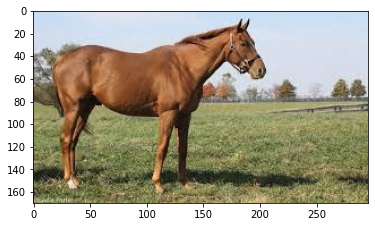

In [ ]:
#Displaying the image of horse
img_horse = mpimg.imread('/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Horses/horse-109.jpg')
plt.imshow(img_horse)

In [ ]:
type(img_horse)

numpy.ndarray

In [ ]:
img_horse.shape

(170, 296, 3)

In [ ]:
os.mkdir('/content/resized_image_Horses')

In [ ]:
original_folder = '/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Horses/'
resized_folder = '/content/resized_image_Horses/'

for i in range(830):
  filename = os.listdir(original_folder)[i]
  image_path = original_folder + filename

  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = image.convert('RGB')

  new_image_path = resized_folder + filename
  image.save(new_image_path)

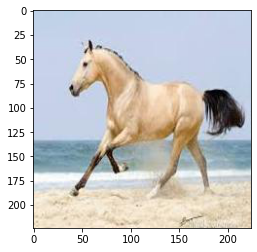

In [ ]:
#Displaying the Resized image of horse
img_Horse_resized = mpimg.imread('/content/resized_image_Horses/horse-117.jpg')
plt.imshow(img_Horse_resized)

In [ ]:
type(img_Horse_resized)

numpy.ndarray

In [ ]:
img_Horse_resized.shape

(224, 224, 3)

In [ ]:
# Converting the resized images into ndarrays
image_directory = '/content/resized_image_Horses/'
image_extension = ['jpg', 'png']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

array_images_Horse = np.asarray([cv.imread(file) for file in files])

In [ ]:
print(array_images_Horse)

[[[[234 220 201]
   [234 220 201]
   [235 221 203]
   ...
   [244 241 237]
   [244 241 237]
   [244 241 237]]

  [[234 220 201]
   [234 220 201]
   [235 221 203]
   ...
   [244 241 237]
   [244 241 237]
   [244 241 237]]

  [[234 220 201]
   [234 220 201]
   [235 221 203]
   ...
   [244 241 237]
   [244 241 237]
   [244 241 237]]

  ...

  [[111 166 157]
   [ 81 136 127]
   [ 82 136 129]
   ...
   [ 63 104  99]
   [ 58  98  93]
   [ 59  99  94]]

  [[111 164 154]
   [ 84 137 128]
   [ 72 125 116]
   ...
   [ 65 107 100]
   [ 68 109 102]
   [ 74 112 106]]

  [[ 94 147 137]
   [ 79 132 122]
   [ 66 119 110]
   ...
   [ 63 105  98]
   [ 73 111 105]
   [ 81 119 113]]]


 [[[ 62  89  80]
   [ 65  93  80]
   [ 53  80  64]
   ...
   [155 178 156]
   [157 178 156]
   [145 167 143]]

  [[ 73 100  91]
   [ 80 108  95]
   [ 60  88  69]
   ...
   [136 159 137]
   [144 166 142]
   [138 160 136]]

  [[ 61  88  78]
   [ 78 107  92]
   [ 59  87  67]
   ...
   [130 154 130]
   [141 165 141]
   [140 165

In [ ]:
type(array_images_Horse)

numpy.ndarray

In [ ]:
array_images_Horse.shape

(830, 224, 224, 3)

In [ ]:
# Creating lable names

y_Horse = np.empty(830)
y_Horse.fill(2)

In [ ]:
y_Horse = y_Horse.astype(int)

In [ ]:
y_Horse.shape

(830,)

In [ ]:
type(y_Horse)

numpy.ndarray

In [ ]:
print(y_Horse)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

**Converting Human images into ndarray and labeling**

In [ ]:
os.chdir('/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN')

In [ ]:
os.chdir('Humans')

In [ ]:
os.listdir('.')

['rider-108.jpg',
 'rider-107.jpg',
 'rider-106.jpg',
 'rider-105.jpg',
 'rider-101.jpg',
 'rider-102.jpg',
 'rider-100.jpg',
 'rider-109.jpg',
 'rider-10.jpg',
 'rider-104.jpg',
 'rider-1.jpg',
 'rider-103.jpg',
 'rider-12.jpg',
 'rider-127.jpg',
 'rider-113.jpg',
 'rider-133.jpg',
 'rider-124.jpg',
 'rider-118.jpg',
 'rider-128.jpg',
 'rider-116.jpg',
 'rider-111.jpg',
 'rider-132.jpg',
 'rider-120.jpg',
 'rider-112.jpg',
 'rider-13.jpg',
 'rider-130.jpg',
 'rider-115.jpg',
 'rider-123.jpg',
 'rider-11.jpg',
 'rider-126.jpg',
 'rider-125.jpg',
 'rider-121.jpg',
 'rider-114.jpg',
 'rider-131.jpg',
 'rider-110.jpg',
 'rider-117.jpg',
 'rider-119.jpg',
 'rider-122.jpg',
 'rider-129.jpg',
 'rider-139.jpg',
 'rider-142.jpg',
 'rider-144.jpg',
 'rider-146.jpg',
 'rider-141.jpg',
 'rider-137.jpg',
 'rider-138.jpg',
 'rider-143.jpg',
 'rider-14.jpg',
 'rider-147.jpg',
 'rider-145.jpg',
 'rider-135.jpg',
 'rider-140.jpg',
 'rider-134.jpg',
 'rider-136.jpg',
 'rider-149.jpg',
 'rider-166.jpg',

In [ ]:
len(os.listdir('.'))

830

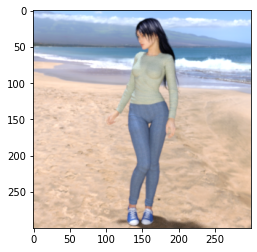

In [ ]:
#Displaying the image of human
img_human = mpimg.imread('/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Humans/human01-10.png')
plt.imshow(img_human)

In [ ]:
type(img_human)

numpy.ndarray

In [ ]:
img_human.shape

(300, 300, 4)

In [ ]:
os.mkdir('/content/resized_image_Humans')

In [ ]:
original_folder = '/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Humans/'
resized_folder = '/content/resized_image_Humans/'

for i in range(830):
  filename = os.listdir(original_folder)[i]
  image_path = original_folder + filename

  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = image.convert('RGB')

  new_image_path = resized_folder + filename
  image.save(new_image_path)

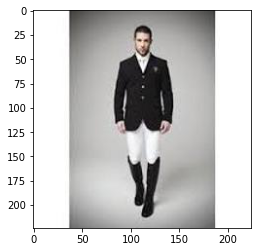

In [ ]:
#Displaying the Resized image of human
img_resized_human = mpimg.imread('/content/resized_image_Humans/rider-110.jpg')
plt.imshow(img_resized_human)

In [ ]:
type(img_resized_human)

numpy.ndarray

In [ ]:
img_resized_human.shape

(224, 224, 3)

In [ ]:
# Converting the resized images into ndarrays
image_directory = '/content/resized_image_Humans/'
image_extension = ['jpg', 'png']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

array_images_Human = np.asarray([cv.imread(file) for file in files])

In [ ]:
print(array_images_Human)

[[[[219 222 227]
   [219 222 227]
   [219 222 227]
   ...
   [231 234 239]
   [231 234 239]
   [231 234 239]]

  [[219 222 227]
   [219 222 227]
   [219 222 227]
   ...
   [231 234 239]
   [231 234 239]
   [231 234 239]]

  [[219 222 227]
   [219 222 227]
   [219 222 227]
   ...
   [231 234 239]
   [231 234 239]
   [231 234 239]]

  ...

  [[159 175 192]
   [159 175 192]
   [158 174 191]
   ...
   [195 204 218]
   [196 205 219]
   [196 205 219]]

  [[159 174 193]
   [159 174 193]
   [159 174 193]
   ...
   [195 204 218]
   [196 205 219]
   [196 205 219]]

  [[159 174 193]
   [159 174 193]
   [159 174 193]
   ...
   [194 203 217]
   [195 204 218]
   [196 205 219]]]


 [[[  4   8   9]
   [  4   8   9]
   [  4   8   9]
   ...
   [  6   9  13]
   [  6   9  13]
   [  6   9  13]]

  [[  4   8   9]
   [  4   8   9]
   [  5   9  10]
   ...
   [  6   9  13]
   [  6   9  13]
   [  6   9  13]]

  [[  4   8   9]
   [  5   9  10]
   [  5   9  10]
   ...
   [  6   9  13]
   [  6   9  13]
   [  6   9

In [ ]:
type(array_images_Human)

numpy.ndarray

In [ ]:
array_images_Human.shape

(830, 224, 224, 3)

In [ ]:
y_Human = np.empty(830)
y_Human.fill(3)

In [ ]:
y_Human = y_Human.astype(int)

In [ ]:
type(y_Human)

numpy.ndarray

In [ ]:
y_Human.shape

(830,)

In [ ]:
print(y_Human)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [ ]:
X = np.concatenate([array_images_Cat, array_images_Dog, array_images_Horse, array_images_Human])

In [ ]:
X.shape

(3320, 224, 224, 3)

In [ ]:
Y = np.concatenate([y_Cat, y_Dog, y_Horse, y_Human])

In [ ]:
Y.shape

(3320,)

In [ ]:
x_train = X
y_train = Y

In [ ]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
# Scalling
X_train = X_train.astype('float')/255
X_test =  X_test.astype('float')/255

Y_train = to_categorical(Y_train, num_classes=4)
Y_test = to_categorical(Y_test, num_classes=4)

In [ ]:
Y_train[0:100]

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],


In [ ]:
X_train[0]

array([[[0.19607843, 0.39607843, 0.34117647],
        [0.17647059, 0.37647059, 0.32156863],
        [0.17254902, 0.36470588, 0.30196078],
        ...,
        [0.20784314, 0.36078431, 0.2745098 ],
        [0.18039216, 0.33333333, 0.24705882],
        [0.14509804, 0.29803922, 0.21176471]],

       [[0.23137255, 0.41176471, 0.36078431],
        [0.18823529, 0.36862745, 0.31764706],
        [0.17647059, 0.35294118, 0.29019608],
        ...,
        [0.21960784, 0.37254902, 0.28627451],
        [0.19215686, 0.34509804, 0.25882353],
        [0.15686275, 0.30980392, 0.22352941]],

       [[0.20392157, 0.35294118, 0.30588235],
        [0.17647059, 0.3254902 , 0.27843137],
        [0.18823529, 0.32941176, 0.2745098 ],
        ...,
        [0.19607843, 0.34901961, 0.25098039],
        [0.16470588, 0.31372549, 0.22745098],
        [0.13333333, 0.28235294, 0.19607843]],

       ...,

       [[0.05882353, 0.18039216, 0.0745098 ],
        [0.06666667, 0.18823529, 0.08235294],
        [0.0745098 , 0

**Soft Max with 6 layers**

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (224,224,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))


**Softmax with 4 layers**

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (224,224,3)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))



model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))



model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))

model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                        

In [ ]:
layer = model.layers
filters, biases = model.layers[0].get_weights()
print(layer[0].name, filters.shape)

conv2d (5, 5, 3, 32)


In [ ]:
model_edited = Sequential()

model_edited.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (224,224,3)))
model_edited.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model_edited.add(MaxPool2D(pool_size=(2,2)))
model_edited.add(Dropout(0.5))


model_edited.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_edited.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_edited.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_edited.add(Dropout(0.25))

model_edited.add(Flatten())
model_edited.add(Dense(256, activation = "relu"))
model_edited.add(Dropout(0.5))
model_edited.add(Dense(4, activation = "softmax"))


In [ ]:
model_edited.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                        

In [ ]:
cnn_layers = [0, 1, 4, 5]
outputs = [model_edited.layers[i].output for i in cnn_layers]
model_selected = Model(inputs = model_edited.inputs, outputs = outputs)
model_selected.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                             

In [ ]:
from PIL import Image

In [ ]:
image = Image.open('/content/download_human.jpeg')
image_resize = image.resize((224, 224))

In [ ]:
image_resize.save('human_resized.jpg')

In [ ]:
image_resize = mpimg.imread('human_resized.jpg')
image_resize_show = plt.imshow(image_resize)
plt.show()

In [ ]:
image_resize.shape

(224, 224, 3)

In [ ]:
image_resize

array([[[187, 196, 203],
        [182, 191, 198],
        [177, 186, 195],
        ...,
        [ 12,  20,   9],
        [ 11,  19,   8],
        [  9,  17,   6]],

       [[186, 193, 203],
        [181, 190, 199],
        [177, 186, 195],
        ...,
        [ 12,  20,   9],
        [ 11,  19,   8],
        [ 10,  18,   7]],

       [[184, 191, 201],
        [181, 188, 198],
        [178, 187, 196],
        ...,
        [ 13,  21,  10],
        [ 12,  20,   9],
        [ 11,  19,   8]],

       ...,

       [[ 90,  72,  70],
        [ 89,  71,  69],
        [ 90,  72,  68],
        ...,
        [ 16,  11,   8],
        [ 14,   9,   6],
        [ 14,   9,   6]],

       [[ 87,  69,  67],
        [ 87,  69,  67],
        [ 89,  71,  67],
        ...,
        [ 19,  11,   9],
        [ 14,   9,   6],
        [ 12,   7,   4]],

       [[ 85,  67,  65],
        [ 86,  68,  66],
        [ 89,  71,  67],
        ...,
        [ 20,  12,  10],
        [ 14,   9,   6],
        [ 12,   7,   4]]

In [ ]:
image_resize = np.expand_dims(image_resize, axis = 0)

In [ ]:
feature_output = model_selected.predict(image_resize)

1/1 [==============================] - 7s 7s/step


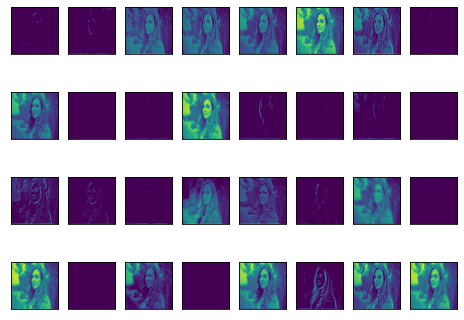

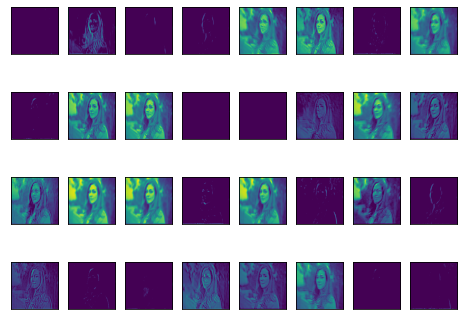

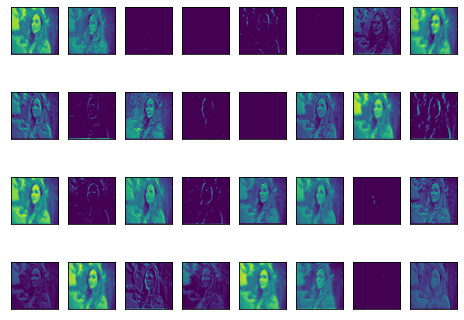

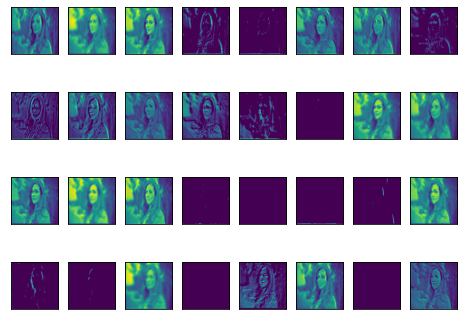

In [ ]:
columns = 8
rows = 4
for feature in feature_output:
  fig = plt.figure(figsize = (8, 6))
  for i in range(1, columns*rows + 1):
    fig = plt.subplot(rows, columns, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(feature[0, :, :, i-1])
  plt.show()
  print("\n\n")


**ADAM**

In [ ]:
model.compile(optimizer = 'Adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs=15)

Epoch 1/15
83/83 [==============================] - 28s 199ms/step - loss: 1.4305 - accuracy: 0.2572 - val_loss: 1.3906 - val_accuracy: 0.2455
Epoch 2/15
83/83 [==============================] - 15s 176ms/step - loss: 1.2328 - accuracy: 0.4270 - val_loss: 1.4209 - val_accuracy: 0.2154
Epoch 3/15
83/83 [==============================] - 15s 177ms/step - loss: 1.1536 - accuracy: 0.4736 - val_loss: 1.3617 - val_accuracy: 0.3389
Epoch 4/15
83/83 [==============================] - 15s 178ms/step - loss: 1.0216 - accuracy: 0.5320 - val_loss: 1.3602 - val_accuracy: 0.2861
Epoch 5/15
83/83 [==============================] - 15s 179ms/step - loss: 0.9640 - accuracy: 0.5847 - val_loss: 1.0924 - val_accuracy: 0.5361
Epoch 6/15
83/83 [==============================] - 15s 180ms/step - loss: 0.8717 - accuracy: 0.6126 - val_loss: 1.1559 - val_accuracy: 0.5075
Epoch 7/15
83/83 [==============================] - 15s 180ms/step - loss: 0.8476 - accuracy: 0.6476 - val_loss: 1.2332 - val_accuracy: 0.4217

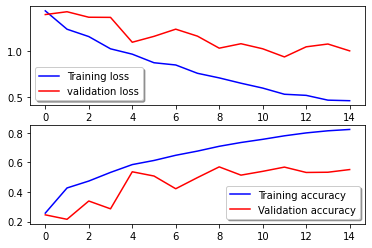

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
model_edited.compile(optimizer = 'Adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model_edited.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs=15)

Epoch 1/15
83/83 [==============================] - 19s 166ms/step - loss: 2.1460 - accuracy: 0.2496 - val_loss: 1.3874 - val_accuracy: 0.2455
Epoch 2/15
83/83 [==============================] - 12s 144ms/step - loss: 1.3863 - accuracy: 0.2575 - val_loss: 1.3876 - val_accuracy: 0.2154
Epoch 3/15
83/83 [==============================] - 12s 145ms/step - loss: 1.3861 - accuracy: 0.2632 - val_loss: 1.3879 - val_accuracy: 0.2154
Epoch 4/15
83/83 [==============================] - 12s 151ms/step - loss: 1.3862 - accuracy: 0.2587 - val_loss: 1.3884 - val_accuracy: 0.2154
Epoch 5/15
83/83 [==============================] - 12s 147ms/step - loss: 1.3858 - accuracy: 0.2579 - val_loss: 1.3890 - val_accuracy: 0.2154
Epoch 6/15
83/83 [==============================] - 12s 147ms/step - loss: 1.3865 - accuracy: 0.2575 - val_loss: 1.3884 - val_accuracy: 0.2154
Epoch 7/15
83/83 [==============================] - 12s 146ms/step - loss: 1.3863 - accuracy: 0.2575 - val_loss: 1.3882 - val_accuracy: 0.2154

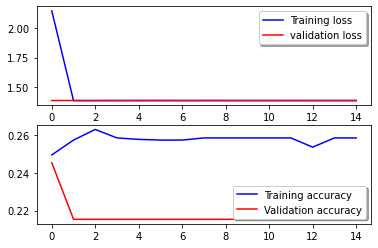

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**SGD**

In [ ]:
model.compile(optimizer = 'SGD' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs=15)

Epoch 1/15
83/83 [==============================] - 32s 225ms/step - loss: 1.3852 - accuracy: 0.2677 - val_loss: 1.3873 - val_accuracy: 0.2154
Epoch 2/15
83/83 [==============================] - 17s 200ms/step - loss: 1.3820 - accuracy: 0.2647 - val_loss: 1.3900 - val_accuracy: 0.2184
Epoch 3/15
83/83 [==============================] - 17s 201ms/step - loss: 1.3739 - accuracy: 0.2910 - val_loss: 1.3928 - val_accuracy: 0.2455
Epoch 4/15
83/83 [==============================] - 17s 201ms/step - loss: 1.3664 - accuracy: 0.2967 - val_loss: 1.3972 - val_accuracy: 0.2455
Epoch 5/15
83/83 [==============================] - 17s 202ms/step - loss: 1.3431 - accuracy: 0.3257 - val_loss: 1.4048 - val_accuracy: 0.2455
Epoch 6/15
83/83 [==============================] - 17s 204ms/step - loss: 1.3352 - accuracy: 0.3358 - val_loss: 1.4125 - val_accuracy: 0.2455
Epoch 7/15
83/83 [==============================] - 17s 206ms/step - loss: 1.3055 - accuracy: 0.3682 - val_loss: 1.4217 - val_accuracy: 0.2154

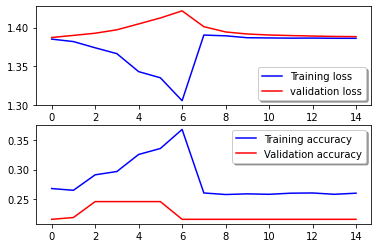

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**RMSprop**

In [ ]:
model.compile(optimizer = 'RMSprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs=15)

Epoch 1/15
83/83 [==============================] - 27s 228ms/step - loss: 22.4130 - accuracy: 0.2406 - val_loss: 1.3875 - val_accuracy: 0.2154
Epoch 2/15
83/83 [==============================] - 17s 201ms/step - loss: 1.4266 - accuracy: 0.2523 - val_loss: 1.3870 - val_accuracy: 0.2154
Epoch 3/15
83/83 [==============================] - 17s 203ms/step - loss: 1.3866 - accuracy: 0.2541 - val_loss: 32.8635 - val_accuracy: 0.2711
Epoch 4/15
83/83 [==============================] - 17s 204ms/step - loss: 2.6910 - accuracy: 0.2428 - val_loss: 1.3907 - val_accuracy: 0.2154
Epoch 5/15
83/83 [==============================] - 17s 205ms/step - loss: 1.4082 - accuracy: 0.2515 - val_loss: 1.3921 - val_accuracy: 0.2154
Epoch 6/15
83/83 [==============================] - 17s 207ms/step - loss: 1.4328 - accuracy: 0.2451 - val_loss: 1.3868 - val_accuracy: 0.2455
Epoch 7/15
83/83 [==============================] - 17s 208ms/step - loss: 1.3874 - accuracy: 0.2602 - val_loss: 1.3872 - val_accuracy: 0.24

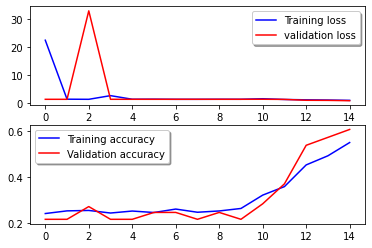

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

path of the image to be predicted: /content/download_humant.jpeg


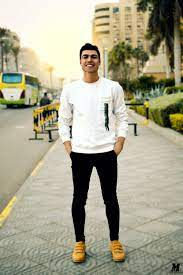

1/1 [==============================] - 0s 20ms/step
[[4.5806742e-06 1.0184776e-03 8.9701869e-02 9.0927517e-01]]
3
The Image Represents Human


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
input_image_path = input("path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_predict_label = np.argmax(input_prediction)
print(input_predict_label)

if input_predict_label == 0:
  print("The Image Represents Cat")
elif input_predict_label == 1:
  print("The Image Represents Dog")
elif input_predict_label == 2:
  print("The Image Represents Horse")
else:
  print("The Image Represents Human")

path of the image to be predicted: /content/download_dog.jpeg


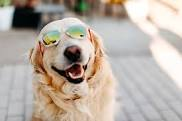

1/1 [==============================] - 0s 16ms/step
[[0.25094807 0.2581577  0.24494472 0.24594946]]
1
The Image Represents Dog


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
input_image_path = input("path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
input_prediction_edited = model_edited.predict(image_reshaped)
print(input_prediction_edited)
input_predict_label_edited = np.argmax(input_prediction_edited)
print(input_predict_label_edited)

if input_predict_label_edited == 0:
  print("The Image Represents Cat")
elif input_predict_label_edited == 1:
  print("The Image Represents Dog")
elif input_predict_label_edited == 2:
  print("The Image Represents Horse")
else:
  print("The Image Represents Human")